# Diabeties among Indians dataset 

Diabeties is a new age problem. It occurs when the body is either unable to produce enough insulin or cannot effectively use the insulin it produces. Diabeties can cause a lot of issues and health complications if not managed properly. 
There are majorly three types of diabeties. Type 1 which is a condition in which body fails to produce insulin, as they dont  have beta cells in the pancreas to produce it. These type is independed depended on insulin.  Second type is type 2 diabeties, which is common form of diabeties can devolop at any age. These is due to lack of the beta cells to produce enough insulin or body get insulin resistant due to many factors such as obsity,poor diet etc.. 
Third catogory is  gestational diabeties, this happens in the preanant women who have never had diabetes before but who have high blood sugar levels during pregnancy. It affects both the mother and the baby’s health. Though it usually goes away after giving birth, women who've had gestational diabetes have a higher risk of developing type 2 diabetes later in life.

This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The aim of this dataset is to predict, through diagnostic measures, whether a patient has diabetes. 


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

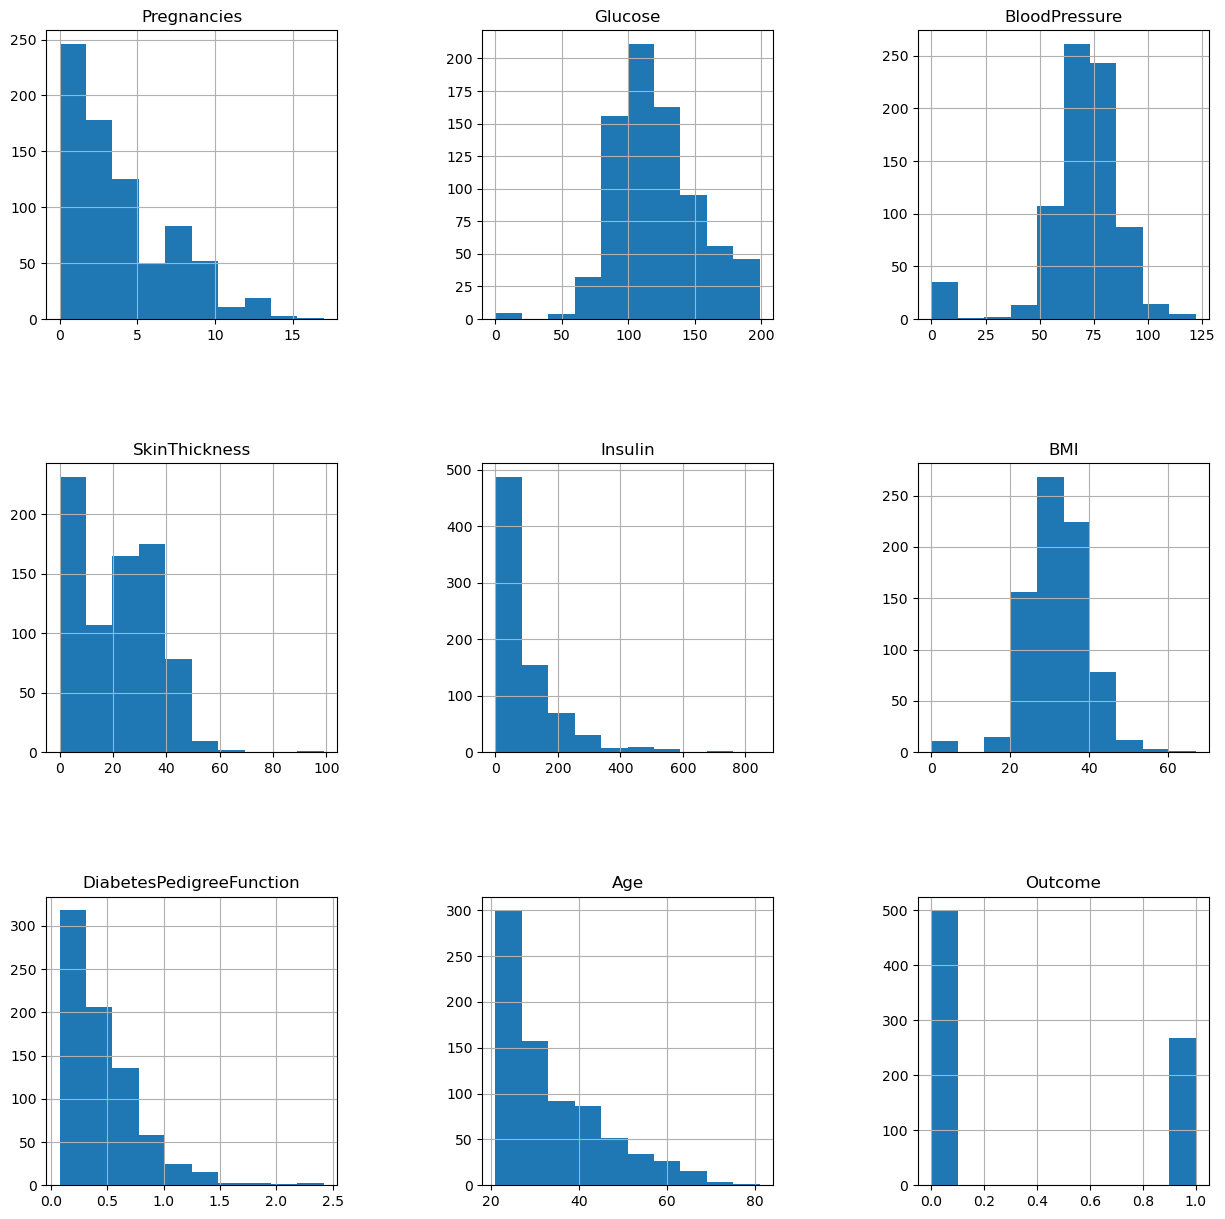

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display summary statistics
print(df.describe())

# Fill missing values with the mean of the column
df = df.fillna(df.mean())

# Plot histograms for each variable
df.hist(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing between subplots
plt.show()


In this project, I conducted an analysis to predict whether a woman aged 21 years or older has diabetes, and to identify the factors that make her prone to diabetes. The dataset for this project was sourced from Kaggle and is composed of a CSV file containing 769 rows and 9 columns.

This shows the dataset, on the demography of the dataset. There is a high number of people around age 21-30 than any other catogory. Blood pressure shows a normal distribution and BMI also shows normal distribution. Which signifies most of the people are in the range of overweight (BMI 25-30), another intresting observation is the blood pressure as the mean is around 69 which is quite low for even normal people. Diabeties have a correation with blood pressue and the mean and std deviation is below the normal standered, which need to be explored further. 



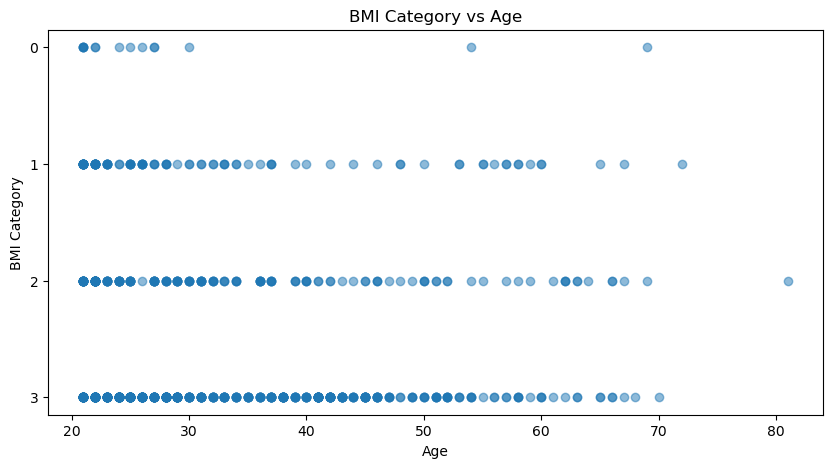

In [11]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return '0'
    elif bmi < 25:
        return '1'
    elif bmi < 30:
        return '2'
    else:
        return '3'

df['BMI Category'] = df['BMI'].apply(categorize_bmi)
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['BMI Category'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI Category')
plt.title('BMI Category vs Age')
plt.show()


As this shows the data set is skewed on the obsity factor, most of the participants are overweight or obsese.

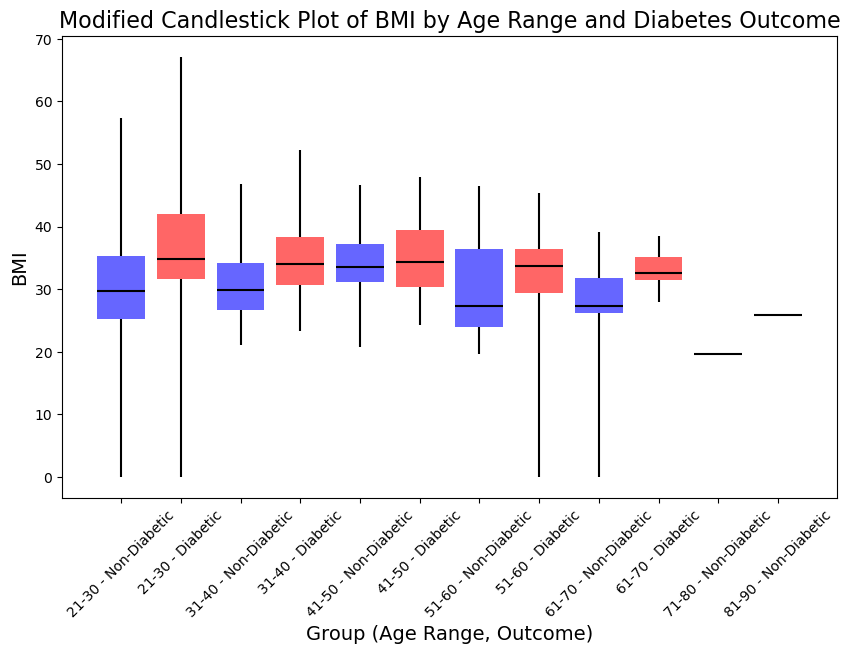

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('diabetes.csv')



# Categorize age into bins
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Group by age range and outcome, and calculate the quartiles, min and max of BMI
summary = data.groupby(['Age Range', 'Outcome'])['BMI'].describe()[['min', '25%', '50%', '75%', 'max']].reset_index()

# Plot the modified candlestick chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in summary.iterrows():
    x = i
    lower_whisker = row['min']
    lower_box = row['25%']
    upper_box = row['75%']
    upper_whisker = row['max']
    median = row['50%']
    
    # Body of the candle
    ax.bar(x, upper_box - lower_box, bottom=lower_box, color='blue' if row['Outcome'] == 0 else 'red', alpha=0.6)
    
    # Lower whisker
    ax.vlines(x, lower_whisker, lower_box, color='black')
    
    # Upper whisker
    ax.vlines(x, upper_box, upper_whisker, color='black')
    
    # Median line
    ax.hlines(median, x-0.4, x+0.4, color='black')

# Adding labels and title
plt.xlabel('Group (Age Range, Outcome)', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.title('Modified Candlestick Plot of BMI by Age Range and Diabetes Outcome', fontsize=16)
plt.xticks(range(len(summary)), [f"{row['Age Range']} - {'Non-Diabetic' if row['Outcome'] == 0 else 'Diabetic'}" for _, row in summary.iterrows()], rotation=45)

# Display the plot
plt.show()



-The blue bars represent non-diabetic individuals, and the red bars represent diabetic individuals.
-The height of each bar represents the interquartile range (IQR) of BMI within each age group.
-The whiskers extend from the minimum to the maximum BMI within each age group.
-The horizontal line within each bar represents the median BMI.

Inferences 
There is a huge variation among the dataset in the BMI group, even with diabeties.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler


X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model with scaled data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)

# Making predictions with the scaled model
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Compute accuracy and AUC-ROC for the scaled model
print('Accuracy (scaled data):', accuracy_score(y_test, y_pred_scaled))
print('AUC-ROC (scaled data):', roc_auc_score(y_test, y_pred_scaled))

# Training another model with unscaled data and a different solver
model_unscaled = LogisticRegression(solver='liblinear')
model_unscaled.fit(X_train, y_train)

# Making predictions with the unscaled model
y_pred_unscaled = model_unscaled.predict(X_test)

# Compute accuracy and AUC-ROC for the unscaled model
print('Accuracy (unscaled data):', accuracy_score(y_test, y_pred_unscaled))
print('AUC-ROC (unscaled data):', roc_auc_score(y_test, y_pred_unscaled))


Accuracy (scaled data): 0.7532467532467533
AUC-ROC (scaled data): 0.7353535353535354
Accuracy (unscaled data): 0.7662337662337663
AUC-ROC (unscaled data): 0.7373737373737373


Running a logistic regression on the dataset to check what is the accuracy and area under curve. As its expected its around 0.75(with scaled and unscaled versions). In this dataset there are some issues, there is no segrregation between type 1 and type 2 diabeties. 

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

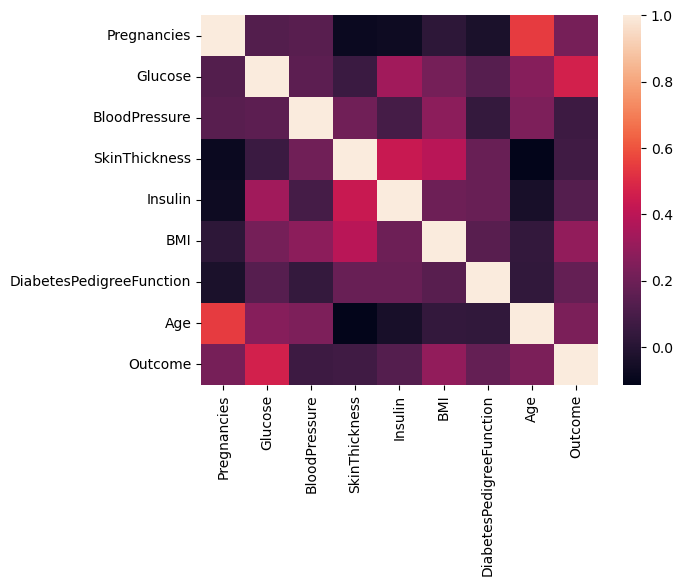

In [33]:
import seaborn as sns 
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)


This is a heatmap. To find the correlation between different factors. According to heatmap, features like Pregnancies, Gluecose, BMI, and Age is more correlated with Outcome.

In [13]:
from sklearn.model_selection import train_test_split

# Define the features and the target variable
X = df.drop(columns=['Outcome'])  # Features (all columns except 'Outcome')
y = df['Outcome']  # Target variable ('Outcome')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train contain the features and target variable for the training set
# and X_test and y_test contain the features and target variable for the testing set


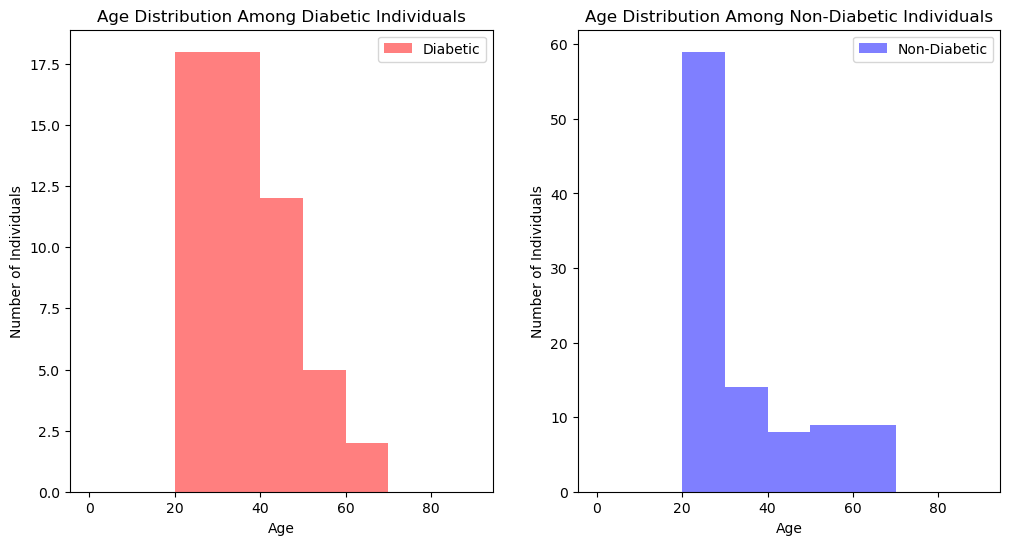

In [16]:
import matplotlib.pyplot as plt

# Split the test data into diabetic and non-diabetic groups
diabetic_group = X_test[y_test == 1]
non_diabetic_group = X_test[y_test == 0]

# Plot the age distribution for the diabetic group
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(diabetic_group['Age'], bins=range(0, 100, 10), alpha=0.5, color='red', label='Diabetic')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.title('Age Distribution Among Diabetic Individuals')
plt.legend()

# Plot the age distribution for the non-diabetic group
plt.subplot(1, 2, 2)
plt.hist(non_diabetic_group['Age'], bins=range(0, 100, 10), alpha=0.5, color='blue', label='Non-Diabetic')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.title('Age Distribution Among Non-Diabetic Individuals')
plt.legend()

# Show the plot
plt.show()


This represents skewness in the data, as it seem most of the people are in 20s who have diabeties in this data set. Which tells most of them might be having type 1 diabeties. Thats why the prediction is off to 0.75

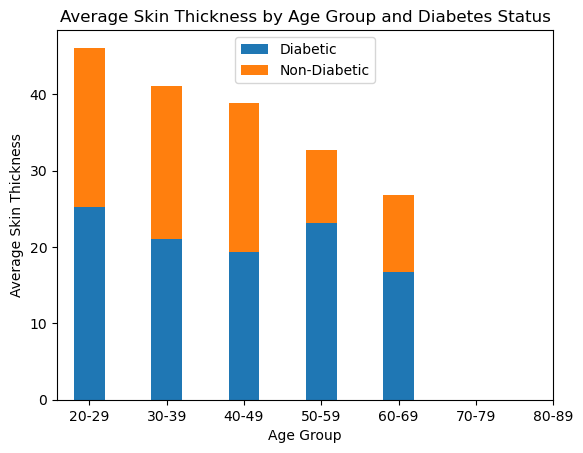

In [18]:


# Define the bins
bins = [20, 30, 40, 50, 60, 70, 80, 90]
# Define the labels for the bins
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Create a new column 'AgeGroup' by binning the age
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Separate into diabetic and non-diabetic groups
diabetic_group = df[df['Outcome'] == 1]
non_diabetic_group = df[df['Outcome'] == 0]

# Calculate average skin thickness for each age group for diabetic
diabetic_avg_skin_thickness = diabetic_group.groupby('AgeGroup')['SkinThickness'].mean()

# Calculate average skin thickness for each age group for non-diabetic
non_diabetic_avg_skin_thickness = non_diabetic_group.groupby('AgeGroup')['SkinThickness'].mean()

# Plot the data
x = range(len(labels))
plt.bar(x, diabetic_avg_skin_thickness, width=0.4, label='Diabetic', align='center')
plt.bar(x, non_diabetic_avg_skin_thickness, width=0.4, label='Non-Diabetic', bottom=diabetic_avg_skin_thickness, align='center')
plt.xlabel('Age Group')
plt.ylabel('Average Skin Thickness')
plt.title('Average Skin Thickness by Age Group and Diabetes Status')
plt.xticks(x, labels)
plt.legend()
plt.show()


Skin thickness reduces with age but it get accelarated due to diabeties. 

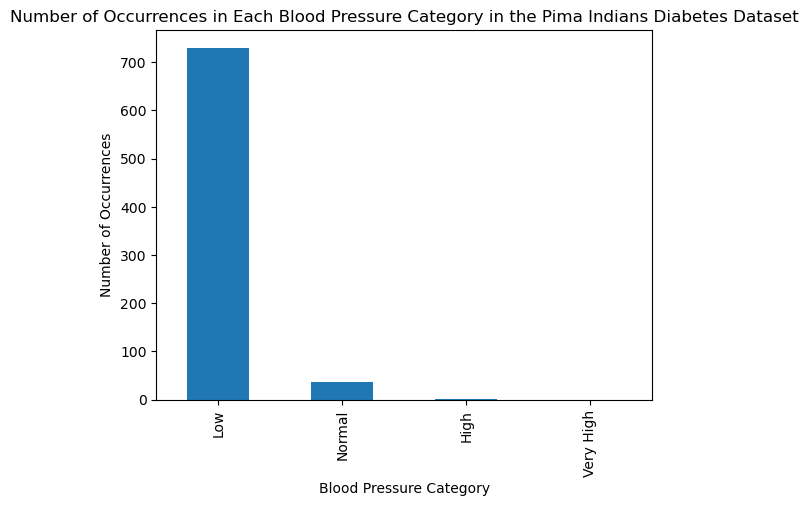

In [20]:
import pandas as pd
import matplotlib.pyplot as plt



# Define the bins for age groups
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
# Define the labels for the age bins
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Define the bins for blood pressure categories
bp_bins = [0, 90, 120, 140, float('inf')]
# Define the labels for the blood pressure bins
bp_labels = ['Low', 'Normal', 'High', 'Very High']

# Create a new column 'AgeGroup' by binning the age
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Create a new column 'BloodPressureCategory' by binning the blood pressure
df['BloodPressureCategory'] = pd.cut(df['BloodPressure'], bins=bp_bins, labels=bp_labels, include_lowest=True)

# Count the number of occurrences in each blood pressure category
bp_counts = df['BloodPressureCategory'].value_counts().sort_index()

# Plot the data
bp_counts.plot(kind='bar')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences in Each Blood Pressure Category in the Pima Indians Diabetes Dataset')
plt.show()


This is also not normal at all, Large percentage of population has low BP. Which would skew data to predict low BP as normal. This needs more understanding why its low in the population. 

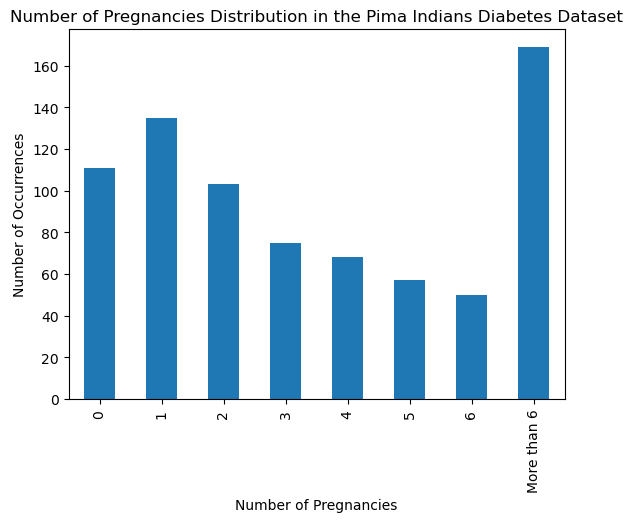

In [26]:


# Function to categorize the number of pregnancies
def categorize_pregnancies(pregnancies):
    if pregnancies == 0:
        return '0'
    elif pregnancies == 1:
        return '1'
    elif pregnancies == 2:
        return '2'
    elif pregnancies == 3:
        return '3'
    elif pregnancies == 4:
        return '4'
    elif pregnancies == 5:
        return '5'
    elif pregnancies == 6:
        return '6'
    else:
        return 'More than 6'

# Create a new column 'PregnancyCategory' by categorizing the number of pregnancies
df['PregnancyCategory'] = df['Pregnancies'].apply(categorize_pregnancies)

# Count the number of occurrences in each pregnancy category
pregnancy_counts = df['PregnancyCategory'].value_counts().sort_index()

# Plot the data
pregnancy_counts.plot(kind='bar')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Occurrences')
plt.title('Number of Pregnancies Distribution in the Pima Indians Diabetes Dataset')
plt.show()


Distribution of pregnancies in the dataset. Maximum pregnancy is 17. Mean is around 3.

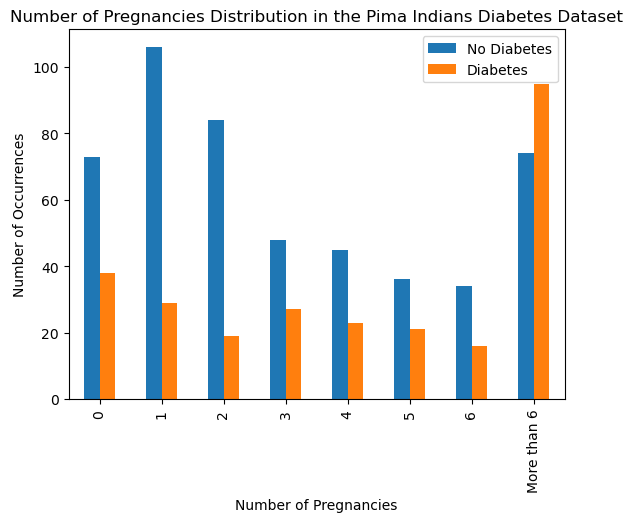

In [27]:
df['PregnancyCategory'] = df['Pregnancies'].apply(categorize_pregnancies)

# Pivot table with PregnancyCategory and Outcome (diabetes vs non-diabetes)
pivot_table = pd.pivot_table(df, values='Age', index='PregnancyCategory', columns='Outcome', aggfunc='count', fill_value=0)

# Plot the data
pivot_table.plot(kind='bar', stacked=False)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Occurrences')
plt.title('Number of Pregnancies Distribution in the Pima Indians Diabetes Dataset')
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

As per the observation in this chart, diabeties is more in the group more than 6, so I wanted to check is it because of the age parameter. 

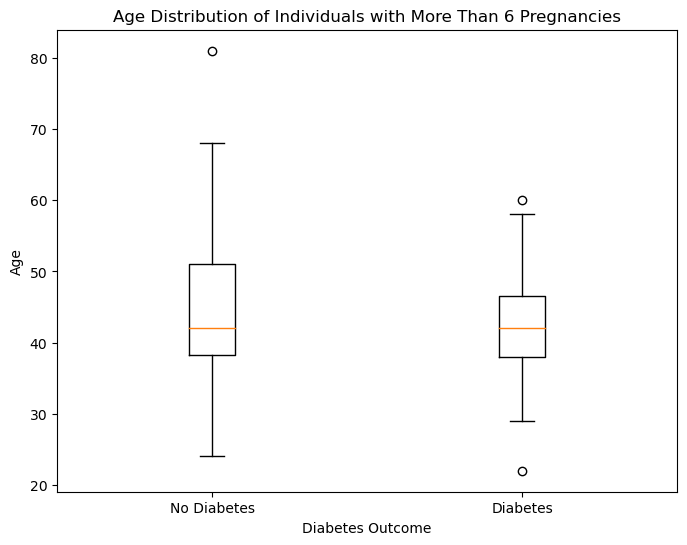

In [28]:
more_than_6_pregnancies = df[df['Pregnancies'] > 6]

# Plot the data using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([more_than_6_pregnancies[more_than_6_pregnancies['Outcome'] == 0]['Age'],
             more_than_6_pregnancies[more_than_6_pregnancies['Outcome'] == 1]['Age']],
            labels=['No Diabetes', 'Diabetes'])
plt.xlabel('Diabetes Outcome')
plt.ylabel('Age')
plt.title('Age Distribution of Individuals with More Than 6 Pregnancies')
plt.show()

Average age for both dataset is similar(around 45) and age plays a huge factor in type 2 diabeties so this is inconclusive regarding pregancy is cause for diabeties. 